<a href="https://colab.research.google.com/github/Likitha-Thirumalasetty/Optical-Character-Recognition-of-Handwritten-Digits/blob/main/OCR_of_Handwritten_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### OCR (Optical Character Recognition)  
OCR is a technology that converts text from images, handwritten notes, or printed documents into machine-readable text. It uses machine learning and deep learning algorithms, like convolutional neural networks (CNNs), to recognize characters and patterns. Applications include digitizing books, automating data entry, and recognizing handwritten text in real-world scenarios.

### MNIST Dataset  
The MNIST dataset is a widely-used benchmark in machine learning, containing 70,000 grayscale images of handwritten digits (0–9), with 60,000 for training and 10,000 for testing. Each 28x28 pixel image is ideal for evaluating models in image classification and serves as a foundational dataset for beginners in deep learning.

In [7]:
# loading the libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

In [8]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Data preprocessing

In [9]:
# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data to include channel dimension
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

Building the model

In [10]:
# Build CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compiling the model

In [11]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Training the model

In [12]:
# Train the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 58s 118ms/step - accuracy: 0.7721 - loss: 0.7071 - val_accuracy: 0.9759 - val_loss: 0.0796
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 117ms/step - accuracy: 0.9587 - loss: 0.1367 - val_accuracy: 0.9842 - val_loss: 0.0466
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 119ms/step - accuracy: 0.9716 - loss: 0.0983 - val_accuracy: 0.9877 - val_loss: 0.0365
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 117ms/step - accuracy: 0.9756 - loss: 0.0802 - val_accuracy: 0.9876 - val_loss: 0.0345
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 117ms/step - accuracy: 0.9784 - loss: 0.0710 - val_accuracy: 0.9899 - val_loss: 0.0297
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 117ms/step - accuracy: 0.9799 - loss: 0.0661 - val_accuracy: 0.9903 - val_loss: 0.0306
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 57s 121ms/step - accuracy: 0.9826 - loss: 0.0562 - val_accuracy: 0.9913 - val_loss: 0.0262
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 117ms/step - accuracy: 0.9853 - loss: 0

Evaluating the model

In [13]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9906 - loss: 0.0275
Test Accuracy: 0.99


Prediction made

In [14]:
# Predict on the test set
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


Test Report

In [15]:
# Classification report
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Testing the model on a random image

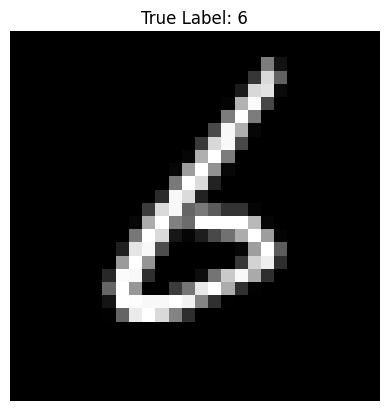

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Predicted Label: 6


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('handwritten_digit_recognition.h5')

# Pick a random image from the test dataset
random_index = np.random.randint(0, x_test.shape[0])
random_image = x_test[random_index]
true_label = y_test[random_index].argmax()

# Display the image
plt.imshow(random_image.reshape(28, 28), cmap='gray')
plt.title(f"True Label: {true_label}")
plt.axis('off')
plt.show()

# Preprocess the image for prediction
random_image = random_image.reshape(1, 28, 28, 1)  # Reshape to match input dimensions

# Predict using the model
prediction = model.predict(random_image)
predicted_label = np.argmax(prediction)

# Display the prediction
print(f"Predicted Label: {predicted_label}")